<a href="https://colab.research.google.com/github/piyushsrivastav/Adult-Census-Income/blob/main/reunion_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TASK-2**

**Develop the ML model(s) to predict the credit risk(low or high) for a given applicant.** 

**Business Constraint:** Note that it is worse to state an applicant as a low credit risk when they are actually a high risk, than it is to state an applicant to be a high credit risk when they aren’t.

**Provide the answers for the below points:**

1. Explain your intuition behind the features used for modeling.
2. Are you creating new derived features? If yes explain the intuition behind them.
3. Are there missing values? If yes how you plan to handle it.
4. How categorical features are handled for modeling.
5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.
6. Do you plan to drop the correlated feature? If yes then how.
7. Which ML algorithm you plan to use for modeling.
8. **Train two (at least) ML models** to predict the credit risk & provide the confusion matrix for each model.
9. How you will select the hyperparameters for models trained in above step.
10. Which metric(s) you will choose to select between the set of models.
11. Explain how you will export the trained models & deploy it for prediction in production.

**Optional but good to have:**

1. Build a dashboard using python/tableau/any other platform of choice to visualize the above
2. Tell us about other real-world data features that you would have liked to see in the dataset and why you think these features might have enriched your analysis

In [106]:
# importing libraries


from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_validate

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('comb.csv')
df.head()

,high_risk_applicant,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,...,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,0,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,...,1,own,4,skilled employee / official,7 years,NaN,1,NaN,NaN,0
1,1,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,...,1,own,2,skilled employee / official,1 year,4 years,1,Low,0,2 lac
2,0,12,education,2096000,2,real estate,0,0,NaN,1,...,2,own,3,unskilled - resident,4 years,7 years,1,Low,NaN,NaN
3,0,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,...,2,for free,4,skilled employee / official,4 years,7 years,1,Low,NaN,0
4,1,24,new vehicle,4870000,3,NaN,0,0,NaN,2,...,2,for free,4,skilled employee / official,1 year,4 years,1,Low,NaN,0


In [107]:
## Alternatively using github
# url = 'https://raw.githubusercontent.com/piyushsrivastav/credit-risk/main/applicant.csv?token=GHSAT0AAAAAABZLDGGRCYNPGHVK5ND4UJU2YZYLSEQ'
# df1 = pd.read_csv(url)

In [108]:
# url = 'https://raw.githubusercontent.com/piyushsrivastav/credit-risk/main/loan.csv?token=GHSAT0AAAAAABZLDGGRXMCPQEK4FAOPHZKKYZYLSWA'
# df2 = pd.read_csv(url)

In [109]:
# df_Original = pd.concat([df1, df2], axis=1, sort=False) 
# df = df_Original.copy(deep=True) # Backup the original data

In [110]:
df.shape

(1000, 24)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   high_risk_applicant                                       1000 non-null   int64 
 1   Months_loan_taken_for                                     1000 non-null   int64 
 2   Purpose                                                   988 non-null    object
 3   Principal_loan_amount                                     1000 non-null   int64 
 4   EMI_rate_in_percentage_of_disposable_income               1000 non-null   int64 
 5   Property                                                  846 non-null    object
 6   Has_coapplicant                                           1000 non-null   int64 
 7   Has_guarantor                                             1000 non-null   int64 
 8   Other_EMI_plans              

# Data preparation for model building


## All the features that have 3 to 4 categories, using One-Hot Encoding for them

In [112]:
X = pd.get_dummies(X,drop_first=True)
df=pd.get_dummies(df,columns=['Marital_status','Gender','Housing','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)','Savings_account_balance','Property','Loan_history'])

In [113]:
df.head()

,high_risk_applicant,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Primary_applicant_age_in_years,...,Savings_account_balance_Medium,Savings_account_balance_Very high,Property_building society savings agreement/life insurance,Property_car or other,Property_real estate,Loan_history_all loans at this bank paid back duly,Loan_history_critical/pending loans at other banks,Loan_history_delay in paying off loans in the past,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly
0,0,6,electronic equipment,1169000,4,0,0,NaN,2,67,...,0,0,0,0,1,0,1,0,0,0
1,1,48,electronic equipment,5951000,2,0,0,NaN,1,22,...,0,0,0,0,1,0,0,0,1,0
2,0,12,education,2096000,2,0,0,NaN,1,49,...,0,0,0,0,1,0,1,0,0,0
3,0,42,FF&E,7882000,2,0,1,NaN,1,45,...,0,0,1,0,0,0,0,0,1,0
4,1,24,new vehicle,4870000,3,0,0,NaN,2,53,...,0,0,0,0,0,0,0,1,0,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   high_risk_applicant                                             1000 non-null   int64 
 1   Months_loan_taken_for                                           1000 non-null   int64 
 2   Purpose                                                         988 non-null    object
 3   Principal_loan_amount                                           1000 non-null   int64 
 4   EMI_rate_in_percentage_of_disposable_income                     1000 non-null   int64 
 5   Has_coapplicant                                                 1000 non-null   int64 
 6   Has_guarantor                                                   1000 non-null   int64 
 7   Other_EMI_plans                                              

# Since most of our data has already been encoded we should scale columns that have large no of categories using Label encoding

In [115]:
from sklearn import preprocessing    

In [116]:
# label_encoder object knows how to understand word labels. 
le = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['Purpose']= le.fit_transform(df['Purpose'])
df['Other_EMI_plans']= le.fit_transform(df['Other_EMI_plans'])
df['Employment_status']= le.fit_transform(df['Employment_status'])
df['Has_been_employed_for_at_least']= le.fit_transform(df['Has_been_employed_for_at_least'])
df['Has_been_employed_for_at_most']= le.fit_transform(df['Has_been_employed_for_at_most'])
print(df.head())

   high_risk_applicant  Months_loan_taken_for  Purpose  Principal_loan_amount  \
0                    0                      6        5                1169000   
1                    1                     48        5                5951000   
2                    0                     12        4                2096000   
3                    0                     42        0                7882000   
4                    1                     24        6                4870000   

   EMI_rate_in_percentage_of_disposable_income  Has_coapplicant  \
0                                            4                0   
1                                            2                0   
2                                            2                0   
3                                            2                0   
4                                            3                0   

   Has_guarantor  Other_EMI_plans  Number_of_existing_loans_at_this_bank  \
0              0                2 

In [117]:
df.head(25)

,high_risk_applicant,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Primary_applicant_age_in_years,...,Savings_account_balance_Medium,Savings_account_balance_Very high,Property_building society savings agreement/life insurance,Property_car or other,Property_real estate,Loan_history_all loans at this bank paid back duly,Loan_history_critical/pending loans at other banks,Loan_history_delay in paying off loans in the past,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly
0,0,6,5,1169000,4,0,0,2,2,67,...,0,0,0,0,1,0,1,0,0,0
1,1,48,5,5951000,2,0,0,2,1,22,...,0,0,0,0,1,0,0,0,1,0
2,0,12,4,2096000,2,0,0,2,1,49,...,0,0,0,0,1,0,1,0,0,0
3,0,42,0,7882000,2,0,1,2,1,45,...,0,0,1,0,0,0,0,0,1,0
4,1,24,6,4870000,3,0,0,2,2,53,...,0,0,0,0,0,0,0,1,0,0
5,0,36,4,9055000,2,0,0,2,1,35,...,0,0,0,0,0,0,0,0,1,0
6,0,24,0,2835000,3,0,0,2,1,53,...,0,0,1,0,0,0,0,0,1,0
7,0,36,8,6948000,2,0,0,2,1,35,...,0,0,0,1,0,0,0,0,1,0
8,0,12,5,3059000,2,0,0,2,1,61,...,0,1,0,0,1,0,0,0,1,0
9,1,30,6,5234000,4,0,0,2,2,28,...,0,0,0,1,0,0,1,0,0,0


In [118]:
df.dtypes

high_risk_applicant                                               int64
Months_loan_taken_for                                             int64
Purpose                                                           int64
Principal_loan_amount                                             int64
EMI_rate_in_percentage_of_disposable_income                       int64
Has_coapplicant                                                   int64
Has_guarantor                                                     int64
Other_EMI_plans                                                   int64
Number_of_existing_loans_at_this_bank                             int64
Primary_applicant_age_in_years                                    int64
Number_of_dependents                                              int64
Years_at_current_residence                                        int64
Employment_status                                                 int64
Has_been_employed_for_at_least                                  

### All integer types....Ready for SMOT

### Scaling and Distributing
- #### In this phase, we will first scale the target column high_risk_applicant. We need to also create a sub sample of the dataframe in order to have an equal amount of High and Low risk cases, helping our algorithms better understand patterns that determines whether a person could be a defaulter or not.
### A sub-Sample
- #### In this scenario, our subsample will be a dataframe with a 50/50 ratio of High and Low risk cases. Meaning our sub-sample will have the same amount of High and Low risk cases.
### Why create a sub-Sample:
- #### We saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:
### Overfitting:
- #### Our classification model will assume that in most cases there are no risks! What we want for our model is to be certain when a high risk occurs.
### Wrong Correlations:
- #### It will be useful to understand how each of the features influence the result (FHigh and Low risk cases) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

# Handle the imbalanced data using oversampling or under sampling approach, and 
## check the distribution of the re-sampled target class.

# We are balancing the imbalanced data using Oversampling/Upsampling approach

In [119]:
Y = df["high_risk_applicant"]
X = df.drop('high_risk_applicant',axis=1)

In [120]:
print("Before UpSampling, counts of label '1': {}".format(sum(Y==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(Y==0)))
print("Before UpSampling, Checking the distribution of the resampled target class:")
print(pd.DataFrame(Y).value_counts(normalize=True)*100)

#Synthetic Minority Over Sampling Technique

sm = SMOTE(sampling_strategy=0.65) #sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   
X_smote, Y_smote = sm.fit_resample(X, Y)


print("\nAfter UpSampling, counts of label '1': {}".format(sum(Y_smote==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(Y_smote==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After UpSampling, the shape of train_y: {}'.format(Y_smote.shape))
print("After UpSampling, Checking the distribution of the resampled target class:")
print(pd.DataFrame(Y_smote).value_counts(normalize=True)*100)

Before UpSampling, counts of label '1': 300
Before UpSampling, counts of label '0': 700 

Before UpSampling, Checking the distribution of the resampled target class:
high_risk_applicant
0                      70.0
1                      30.0
dtype: float64

After UpSampling, counts of label '1': 455
After UpSampling, counts of label '0': 700 

After UpSampling, the shape of train_X: (1155, 40)
After UpSampling, the shape of train_y: (1155,)
After UpSampling, Checking the distribution of the resampled target class:
high_risk_applicant
0                      60.606061
1                      39.393939
dtype: float64


# Now We are balancing the imbalanced data using under sampling/Down sampling approach

In [121]:
from imblearn.under_sampling import RandomUnderSampler
print("Before Down Sampling, counts of label '1': {}".format(sum(Y==1)))
print("Before Down Sampling, counts of label '0': {} \n".format(sum(Y==0)))
print("Before Down Sampling, Checking the distribution of the resampled target class:")
print(pd.DataFrame(Y).value_counts(normalize=True)*100)

rus = RandomUnderSampler(sampling_strategy=0.65)
X_rus, Y_rus = rus.fit_resample(X, Y)

print("After Down Sampling, counts of label '1': {}".format(sum(Y_rus==1)))
print("After Down Sampling, counts of label '0': {} \n".format(sum(Y_rus==0)))

print('After Down Sampling, the shape of train_X: {}'.format(X_rus.shape))
print('After Down Sampling, the shape of train_y: {} \n'.format(Y_rus.shape))
print("After Down Sampling, Checking the distribution of the resampled target class:")
print(pd.DataFrame(Y_rus).value_counts(normalize=True)*100)

Before Down Sampling, counts of label '1': 300
Before Down Sampling, counts of label '0': 700 

Before Down Sampling, Checking the distribution of the resampled target class:
high_risk_applicant
0                      70.0
1                      30.0
dtype: float64
After Down Sampling, counts of label '1': 300
After Down Sampling, counts of label '0': 461 

After Down Sampling, the shape of train_X: (761, 40)
After Down Sampling, the shape of train_y: (761,) 

After Down Sampling, Checking the distribution of the resampled target class:
high_risk_applicant
0                      60.578187
1                      39.421813
dtype: float64


### We can observe, we have successfully oversampled/undersampled the minority class, and the distribution of the target class is balanced 60.6%-39.4%.Hence we can use any one approach.

### Hence, we are considering DownSample for further model building for reducing the run time during model building.

## Equally Distributing and Correlating: Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing

####Split the data into train and test.

#### Splitting the imbalanced data

In [122]:

X_train_imb, X_test_imb, Y_train_imb, Y_test_imb = train_test_split(X,Y,test_size=0.30,random_state=42) 

## Feature Scaling
ss = StandardScaler()
X_train_imb.iloc[:,:] = ss.fit_transform(X_train_imb.iloc[:,:])
X_test_imb.iloc[:,:] = ss.transform(X_test_imb.iloc[:,:])

print('Shape of training feature:', X_train_imb.shape)
print('Shape of testing feature:', X_test_imb.shape)
print('Shape of Target column training label:', Y_train_imb.shape)
print('Shape of Target column testing label:', Y_test_imb.shape)

Shape of training feature: (700, 40)
Shape of testing feature: (300, 40)
Shape of Target column training label: (700,)
Shape of Target column testing label: (300,)


In [123]:
# Y = df["high_risk_applicant"]
# X = df.drop('high_risk_applicant',axis=1)

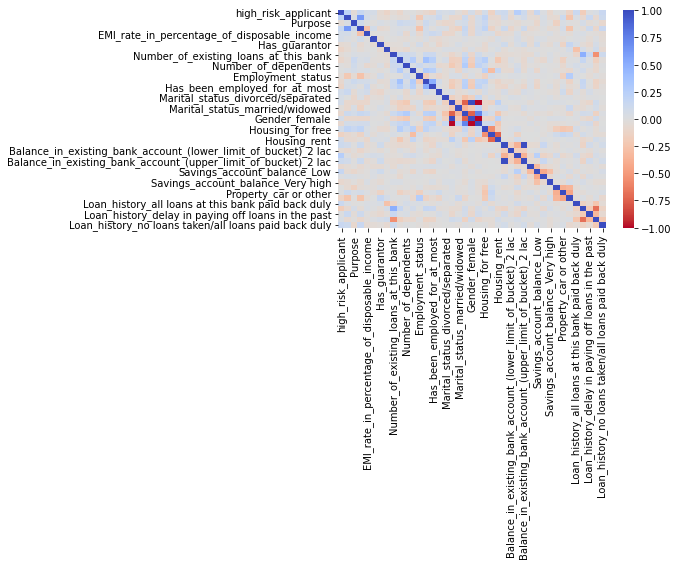

In [124]:
# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
#ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

###Correlation features have improved in this subsample compared to the one analysed in Task1. EMI and Principal loan amount look like they have minimum correlation

### Splitting the balanced data

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smote,Y_smote,test_size=0.30,random_state=42) 

## Feature Scaling
ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of Target column training label:', Y_train.shape)
print('Shape of Target column testing label:', Y_test.shape)

Shape of training feature: (808, 40)
Shape of testing feature: (347, 40)
Shape of Target column training label: (808,)
Shape of Target column testing label: (347,)


### Function to fit and print the model predictions:

In [126]:
def fit_n_print(model_name, model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    
    model.fit(X_train, y_train)   # fit the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('\t\t\t\t\t\033[1;38;5;124m',model_name,'\033[0;0m')
    ## Computing Accuracy, Recall, and Confusion matrix for test data
    print("\033[1;46;13m Accuracy:\033[0;0m",metrics.accuracy_score(pred,y_test))
    print("\033[1;46;13m Recall:\033[0;0m",metrics.recall_score(pred,y_test))
    print("\033[1;46;13m Classification Report:\033[0;0m",metrics.classification_report(y_test,pred))
    print('\n')
    print('\033[1;46;13m Confusion matrix: \033[0;0m','\n',confusion_matrix(y_test, pred))
    print('\n')

## Using wrapper method with Sequential Forward Selection
### - taking hours to run, skipped

In [127]:
# #!pip install mlxtend
# import joblib
# import sys
# sys.modules['sklearn.externals.joblib'] = joblib
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [128]:
# from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
# # evaluation metrics
# from sklearn import metrics
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# from sklearn.metrics import make_scorer,precision_score,recall_score,f1_score
# from scipy.stats import chi2_contingency

In [129]:
# rf_sffs = RandomForestRegressor(max_depth=10, random_state=0)
# sfs1 = sfs(rf_sffs, k_features=19, forward=True, cv=5)
# sfs1 = sfs1.fit(X_train, Y_train)
# sfs1.get_metric_dict()

In [130]:
# fig = plot_sfs(sfs1.get_metric_dict())

# plt.title('Sequential Forward Selection (w. R^2)')
# plt.grid()
# plt.show()

# Using wrapper method with backward feature elimination

In [131]:
dt = DecisionTreeClassifier()
fit_n_print('Decision tree',dt, X_train, X_test, Y_train, Y_test)

					 Decision tree 
 Accuracy: 0.6772334293948127
 Recall: 0.5785714285714286
 Classification Report:               precision    recall  f1-score   support

           0       0.74      0.72      0.73       213
           1       0.58      0.60      0.59       134

    accuracy                           0.68       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.68      0.68      0.68       347



 Confusion matrix:  
 [[154  59]
 [ 53  81]]




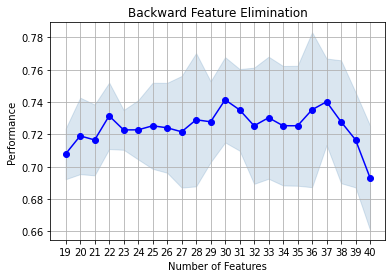

In [132]:
# Build step Backward feature selection
sfs1 = sfs(dt, k_features=19, forward=False, cv=5)
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, Y_train)
sfs2= sfs1.get_metric_dict()
sfs2 = pd.DataFrame.from_dict(sfs2)

fig = plot_sfs(sfs2)

plt.title('Backward Feature Elimination')
plt.grid()
plt.show()

In [133]:
dt_columnList = list(X_train)
dt_feat_cols = list(sfs1.k_feature_idx_)
dt_subsetColumnList = [dt_columnList[i] for i in dt_feat_cols] 

print("list of indexes for features  that needs to be considered for pipeline:\n",dt_feat_cols)
print("the names of the columns based on the index:\n", dt_subsetColumnList)

list of indexes for features  that needs to be considered for pipeline:
 [0, 2, 4, 9, 12, 13, 15, 19, 20, 23, 26, 28, 29, 32, 33, 34, 36, 37, 38]
the names of the columns based on the index:
 ['Months_loan_taken_for', 'Principal_loan_amount', 'Has_coapplicant', 'Number_of_dependents', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Marital_status_divorced/separated', 'Gender_female', 'Gender_male', 'Housing_rent', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)_0', 'Savings_account_balance_High', 'Savings_account_balance_Low', 'Property_building society savings agreement/life insurance', 'Property_car or other', 'Property_real estate', 'Loan_history_critical/pending loans at other banks', 'Loan_history_delay in paying off loans in the past', 'Loan_history_existing loans paid back duly till now']


In [134]:
X_train_dt=pd.DataFrame(X_train[dt_subsetColumnList])
X_test_dt=pd.DataFrame(X_test[dt_subsetColumnList])

print('Shape of training feature:', X_train_dt.shape)
print('Shape of testing feature:', X_test_dt.shape)

Shape of training feature: (808, 19)
Shape of testing feature: (347, 19)


## Giving the features as a list since the column tranformer expects the columns to be tranformed in the form of a list among the others

In [135]:
dt_col_trans = ColumnTransformer([('ss', StandardScaler(), X_train_dt.columns)],remainder='passthrough')
dt_col_trans.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ss', StandardScaler(),
                                 Index(['Months_loan_taken_for', 'Principal_loan_amount', 'Has_coapplicant',
       'Number_of_dependents', 'Has_been_employed_for_at_least',
       'Has_been_employed_for_at_most', 'Marital_status_divorced/separated',
       'Gender_female', 'Gender_male', 'Housing_rent',
       'Balance_in_existing_bank_acc...upper_limit_of_bucket)_0',
       'Savings_account_balance_High', 'Savings_account_balance_Low',
       'Property_building society savings agreement/life insurance',
       'Property_car or other', 'Property_real estate',
       'Loan_history_critical/pending loans at other banks',
       'Loan_history_delay in paying off loans in the past',
       'Loan_history_existing loans paid back duly till now'],
      dtype='object'))])

###Using Embedded Method

In [136]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [137]:
# Initialize ridge regression and mention the learning rate
ridge = Ridge(alpha=.00001)
#Fit the model
ridge.fit(X_train,Y_train)
# print the coefficients of the model
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.02291369 -0.00890234  0.03786788  0.01945491  0.01610845 -0.01863514
 -0.03327394  0.00901637 -0.01340612  0.01850216 -0.00183175 -0.00262258
 -0.02328037 -0.0201898   0.03708187 -0.04878374 -0.06358553 -0.08395355
 -0.17598041 -0.06358553  0.01358668 -0.09727982 -0.090314   -0.05593684
  0.02964706 -0.00197667  0.1089301   0.02964706 -0.01208764  0.03613412
  0.01702328 -0.0009252  -0.06281585 -0.07425592 -0.1005489  -0.02173984
 -0.17352774 -0.08623776 -0.12483929 -0.02373289]


In [138]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, Y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 2.29239428e-02 -8.89563651e-03  3.78379743e-02  1.94352641e-02
  1.60970100e-02 -1.86277440e-02 -3.32724117e-02  8.98085890e-03
 -1.33960506e-02  1.84790274e-02 -1.82619735e-03 -2.62193283e-03
 -2.32804604e-02 -2.01906360e-02  3.70700407e-02 -4.86469699e-02
 -1.09111864e-04 -8.37818122e-02 -1.75652571e-01 -1.27114809e-01
  1.32241269e-02 -9.72477967e-02 -9.02920426e-02 -5.59093026e-02
  2.36495085e-02 -1.98111888e-03  1.08911363e-01  3.56204361e-02
 -1.21007971e-02  3.61069541e-02  1.69930499e-02 -9.26726008e-04
 -6.27969919e-02 -7.42346326e-02 -1.00538223e-01 -2.17003356e-02
 -1.73445876e-01 -8.61753733e-02 -1.24762180e-01 -2.36852608e-02]


In [139]:
# print the accuracy of ridge regularization
print(ridge.score(X_train, Y_train))
print(ridge.score(X_test, Y_test))

0.38226123530474787
0.3235855700435897


In [140]:
# print the accuracy of lasso regularization
print(lasso.score(X_train, Y_train))
print(lasso.score(X_test, Y_test))

0.3822611681876724
0.3235905985641385


###Model Building and evaluation:
Buildin a base model using the Original Imbalanced data

In [141]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X,Y, test_size=0.20, random_state=42)

print(X_train_base.shape,X_test_base.shape)
print(y_train_base.shape,y_test_base.shape)

(800, 40) (200, 40)
(800,) (200,)


In [142]:
# print the accuracy of lasso regularization
print(lasso.score(X_train, Y_train))
print(lasso.score(X_test, Y_test))

0.3822611681876724
0.3235905985641385


# Model Building and evaluation Approach and thought
##Classifiers (used UnderSampling):
I am trying three types of classifiers and decide which classifier will be more effective in detecting risk. Before we have to split our data into training and testing sets and separate the features from the labels.
## Summary:
- Logistic Regression classifier is more accurate than the other classifiers in most cases.
- GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
- Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that LogisticRegression pretty accurately separates risk and non-risk potential.

-The wider the gap between the training score and the cross validation score, the more likely that model is overfitting (high variance).
-If the score is low in both training and cross-validation sets this is an indication that model is underfitting (high bias)
-Logistic Regression Classifier shows the best score in both training and cross-validating sets.
### I am Building a base model first using the Original Imbalanced data.

In [143]:
lr_base = LogisticRegression()
lr_base.fit(X, Y)

LogisticRegression()

In [144]:
X_test_pred = lr_base.predict(X_test_imb)
print('Training accuracy of logistic regression on imbalanced data: %.3f' % lr_base.score(X_train_imb, Y_train_imb))
print('Testing accuracy of logistic regression on imbalanced data: %.3f' % lr_base.score(X_test_imb, Y_test_imb))

print("\033[1;46;13m Classification Report:\033[0;0m",metrics.classification_report(Y_test_imb,X_test_pred))
print('\033[1;46;13m Confusion matrix: \033[0;0m','\n',confusion_matrix(Y_test_imb, X_test_pred))

Training accuracy of logistic regression on imbalanced data: 0.390
Testing accuracy of logistic regression on imbalanced data: 0.383
 Classification Report:               precision    recall  f1-score   support

           0       0.64      0.26      0.37       209
           1       0.28      0.66      0.39        91

    accuracy                           0.38       300
   macro avg       0.46      0.46      0.38       300
weighted avg       0.53      0.38      0.38       300

 Confusion matrix:  
 [[ 55 154]
 [ 31  60]]


### For building a base model, choosing Logistic Regression Model for it and when traning the model with imbalanced dataset, we observe that the accuracy of the model is very bad/low i.e 38%
###We can observe that we have a very bad accuracy score, Also, we have target which is highly imbalanced and accuracy will be biased.
###Precisionis good for class 0 (majority class) where as recall is okay for class 1(minority class), due to the imbalance dataset.
###In order to increase our model performance, we need to use the balanced data.

In [145]:
log_reg = LogisticRegression()
fit_n_print('Logistic Regression',log_reg, X_train, X_test, Y_train, Y_test)

# knn = KNeighborsClassifier()
# fit_n_print('K-Nearest Neighbour',knn, X_train, X_test, Y_train, Y_test)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
fit_n_print('Gaussian Naive Bayes',gnb, X_train, X_test, Y_train, Y_test)

dt = DecisionTreeClassifier()  
fit_n_print('Decision Tree',dt, X_train, X_test, Y_train, Y_test)

# rf = RandomForestClassifier(n_estimators= 30, max_depth= 10)
# fit_n_print('Random Forest',rf, X_train, X_test, Y_train, Y_test)

					 Logistic Regression 
 Accuracy: 0.8040345821325648
 Recall: 0.8055555555555556
 Classification Report:               precision    recall  f1-score   support

           0       0.80      0.90      0.85       213
           1       0.81      0.65      0.72       134

    accuracy                           0.80       347
   macro avg       0.80      0.78      0.78       347
weighted avg       0.80      0.80      0.80       347



 Confusion matrix:  
 [[192  21]
 [ 47  87]]


					 Gaussian Naive Bayes 
 Accuracy: 0.7118155619596542
 Recall: 0.5965909090909091
 Classification Report:               precision    recall  f1-score   support

           0       0.83      0.67      0.74       213
           1       0.60      0.78      0.68       134

    accuracy                           0.71       347
   macro avg       0.71      0.73      0.71       347
weighted avg       0.74      0.71      0.72       347



 Confusion matrix:  
 [[142  71]
 [ 29 105]]


					 Decision Tree 
 Accurac

## Hyperparameter tuning of LogisticRegression Model using GridSearchCV approach

In [146]:
from sklearn.model_selection import GridSearchCV
dual=[True,False]
max_iter=[150,160,170]
param_grid = dict(dual=dual,max_iter=max_iter)
lr = LogisticRegression(penalty='l2')
lr_hyper_model = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 5, n_jobs=-1)
fit_n_print('Logistic Regression with tuned hyperparameter',lr_hyper_model, X_train, X_test, Y_train, Y_test)
print("Best Score:\n", lr_hyper_model.best_score_)
print("Best Hyper Parameters:\n", lr_hyper_model.best_params_)

					 Logistic Regression with tuned hyperparameter 
 Accuracy: 0.8040345821325648
 Recall: 0.8055555555555556
 Classification Report:               precision    recall  f1-score   support

           0       0.80      0.90      0.85       213
           1       0.81      0.65      0.72       134

    accuracy                           0.80       347
   macro avg       0.80      0.78      0.78       347
weighted avg       0.80      0.80      0.80       347



 Confusion matrix:  
 [[192  21]
 [ 47  87]]


Best Score:
 0.7723870868798405
Best Hyper Parameters:
 {'dual': False, 'max_iter': 150}


## Not much change in accuracy after GridsearchCV 

## Hyperparameter tuning of GaussianNaiveBayes Model using GridsearchCV

In [147]:

param_grid_nb = {
    'var_smoothing': np.logspace(9,-9, num= 100)
}
gnb = GaussianNB()
gnb_hyper_Model = GridSearchCV(gnb, cv=10, n_jobs=-1, param_grid = param_grid_nb, verbose=1)
fit_n_print('GaussianNB with tuned hyperparameter',gnb_hyper_Model, X_train, X_test, Y_train, Y_test)
print("Best Hyper Parameters:\n", gnb_hyper_Model.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
					 GaussianNB with tuned hyperparameter 
 Accuracy: 0.7521613832853026
 Recall: 0.6666666666666666
 Classification Report:               precision    recall  f1-score   support

           0       0.81      0.77      0.79       213
           1       0.67      0.72      0.69       134

    accuracy                           0.75       347
   macro avg       0.74      0.75      0.74       347
weighted avg       0.76      0.75      0.75       347



 Confusion matrix:  
 [[165  48]
 [ 38  96]]


Best Hyper Parameters:
 {'var_smoothing': 2.848035868435805}


## Accuracy changes  from 70 to 74% after GridsearchCV.  recall  f1-score also improve

## Hyperparameter tuning of DecisionTreeClassifier Model using GridSearchCV approach

In [148]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=42)
#bc = BaggingClassifier(base_estimator=dt)
dt_hyper_model = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
fit_n_print('Decision Tree with tuned hyperparameter',dt_hyper_model, X_train, X_test, Y_train, Y_test)
print("Best Hyper Parameters:\n", dt_hyper_model.best_params_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
					 Decision Tree with tuned hyperparameter 
 Accuracy: 0.6945244956772334
 Recall: 0.625
 Classification Report:               precision    recall  f1-score   support

           0       0.73      0.80      0.76       213
           1       0.62      0.52      0.57       134

    accuracy                           0.69       347
   macro avg       0.68      0.66      0.67       347
weighted avg       0.69      0.69      0.69       347



 Confusion matrix:  
 [[171  42]
 [ 64  70]]


Best Hyper Parameters:
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}


## Accuracy changes  from 66 to 68% after GridsearchCV.  recall  f1-score also improve

# Pipeline:
### Building a pipeline and put all the above steps in the pipeline and fit the pipeline on train data and get predictions on the test data.

In [149]:
#pipeline
from sklearn.pipeline import Pipeline
# to selectively apply data preparation transforms
from sklearn.compose import ColumnTransformer
log_reg_pipeline_dt = Pipeline([('preprocessor',dt_col_trans),('algo',LogisticRegression(random_state=0, n_jobs=-1))])
fit_n_print('Logistic Regression',log_reg_pipeline_dt, X_train_dt, X_test_dt, Y_train, Y_test)


gnb_pipeline_dt = Pipeline([('preprocessor',dt_col_trans),('gnb',gnb)])
fit_n_print('Gaussian Naive Bayes',gnb_pipeline_dt, X_train_dt, X_test_dt, Y_train, Y_test)

dt_pipeline_dt = Pipeline([('preprocessor',dt_col_trans),('algo',DecisionTreeClassifier(max_depth= 7, criterion= 'entropy',random_state=0))])
fit_n_print('Decision Tree',dt_pipeline_dt, X_train_dt, X_test_dt, Y_train, Y_test)

rf_pipeline_dt = Pipeline([('preprocessor',dt_col_trans),('algo',RandomForestClassifier(max_depth= 25, n_estimators= 300, random_state=0, n_jobs=-1))])
fit_n_print('Random Forest',rf_pipeline_dt, X_train_dt, X_test_dt, Y_train, Y_test)

					 Logistic Regression 
 Accuracy: 0.7579250720461095
 Recall: 0.7551020408163265
 Classification Report:               precision    recall  f1-score   support

           0       0.76      0.89      0.82       213
           1       0.76      0.55      0.64       134

    accuracy                           0.76       347
   macro avg       0.76      0.72      0.73       347
weighted avg       0.76      0.76      0.75       347



 Confusion matrix:  
 [[189  24]
 [ 60  74]]


					 Gaussian Naive Bayes 
 Accuracy: 0.6858789625360231
 Recall: 0.5827814569536424
 Classification Report:               precision    recall  f1-score   support

           0       0.77      0.70      0.73       213
           1       0.58      0.66      0.62       134

    accuracy                           0.69       347
   macro avg       0.67      0.68      0.68       347
weighted avg       0.69      0.69      0.69       347



 Confusion matrix:  
 [[150  63]
 [ 46  88]]


					 Decision Tree 
 Accurac

## Conclusions
## The evaluation metrics of the base model

In [150]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Instantiate the machine learning classifiers
log_reg_model=log_reg
gnb_model=gnb
dt_model = dt


# Define the models evaluation function
def models_evaluation(X, Y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log_reg_mod = cross_validate(log_reg_model, X, Y, cv=folds, scoring=scoring)
    #knn_mod = cross_validate(knn_model, X, Y, cv=folds, scoring=scoring)
    gnb_mod = cross_validate(gnb_model, X, Y, cv=folds, scoring=scoring)
    dt_mod = cross_validate(dt_model, X, Y, cv=folds, scoring=scoring)
    #rf_mod = cross_validate(rf_model, X, Y, cv=folds, scoring=scoring)

    # Create a data frame with the models performance metrics scores
    print("\033[1;46;13m Evaluation Matrics without hyperparameter tuning\033[0;0m")
    models_scores_table = pd.DataFrame({'Logistic Regression':[log_reg_mod['test_accuracy'].mean(),
                                                               log_reg_mod['test_precision'].mean(),
                                                               log_reg_mod['test_recall'].mean(),
                                                               log_reg_mod['test_f1_score'].mean()],
                                       
                                        # 'K-Nearest Neighbour':[knn_mod['test_accuracy'].mean(),
                                        #                            knn_mod['test_precision'].mean(),
                                        #                            knn_mod['test_recall'].mean(),
                                        #                            knn_mod['test_f1_score'].mean()],
                                        
                                        'Gaussian Naive Bayes':[gnb_mod['test_accuracy'].mean(),
                                                                   gnb_mod['test_precision'].mean(),
                                                                   gnb_mod['test_recall'].mean(),
                                                                   gnb_mod['test_f1_score'].mean()],
                                        
                                        'Decision Tree':[dt_mod['test_accuracy'].mean(),
                                                                   dt_mod['test_precision'].mean(),
                                                                   dt_mod['test_recall'].mean(),
                                                                   dt_mod['test_f1_score'].mean()],
                                        
                                        # 'Random Forest':[rf_mod['test_accuracy'].mean(),
                                        #                            rf_mod['test_precision'].mean(),
                                        #                            rf_mod['test_recall'].mean(),
                                        #                            rf_mod['test_f1_score'].mean()],
                                        },
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X_test, Y_test, 14)

 Evaluation Matrics without hyperparameter tuning


,Logistic Regression,Gaussian Naive Bayes,Decision Tree,Best Score
Accuracy,0.751667,0.486548,0.645119,Logistic Regression
Precision,0.689879,0.426943,0.542033,Logistic Regression
Recall,0.638889,0.939683,0.550000,Gaussian Naive Bayes
F1 Score,0.659151,0.586233,0.534437,Logistic Regression


## The evaluation metrics of the tuned model

In [151]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Instantiate the machine learning classifiers
log_reg_model=lr_hyper_model
# knn_two_model=knn_two
gnb_model=gnb_hyper_Model
dt_model = dt_hyper_model
# rf_model=rf_hyper_model

# Define the models evaluation function
def models_evaluation(X, Y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log_reg_mod = cross_validate(log_reg_model, X, Y, cv=folds, scoring=scoring)
    # knn_two_mod = cross_validate(knn_two_model, X, Y, cv=folds, scoring=scoring)
    gnb_mod = cross_validate(gnb_model, X, Y, cv=folds, scoring=scoring)
    dt_mod = cross_validate(dt_model, X, Y, cv=folds, scoring=scoring)
    # rf_mod = cross_validate(rf_model, X, Y, cv=folds, scoring=scoring)

    # Create a data frame with the models performance metrics scores
    print("\033[1;46;13m Evaluation Matrics after hyperparameter tuning\033[0;0m")
    models_scores_table = pd.DataFrame({'Logistic Regression':[log_reg_mod['test_accuracy'].mean(),
                                                               log_reg_mod['test_precision'].mean(),
                                                               log_reg_mod['test_recall'].mean(),
                                                               log_reg_mod['test_f1_score'].mean()],
                                       
                                        # 'K-Nearest Neighbour':[knn_two_mod['test_accuracy'].mean(),
                                        #                            knn_two_mod['test_precision'].mean(),
                                        #                            knn_two_mod['test_recall'].mean(),
                                        #                            knn_two_mod['test_f1_score'].mean()],
                                        
                                        'Gaussian Naive Bayes':[gnb_mod['test_accuracy'].mean(),
                                                                   gnb_mod['test_precision'].mean(),
                                                                   gnb_mod['test_recall'].mean(),
                                                                   gnb_mod['test_f1_score'].mean()],
                                        
                                        'Decision Tree':[dt_mod['test_accuracy'].mean(),
                                                                   dt_mod['test_precision'].mean(),
                                                                   dt_mod['test_recall'].mean(),
                                                                   dt_mod['test_f1_score'].mean()],
                                        
                                        # 'Random Forest':[rf_mod['test_accuracy'].mean(),
                                        #                            rf_mod['test_precision'].mean(),
                                        #                            rf_mod['test_recall'].mean(),
                                        #                            rf_mod['test_f1_score'].mean()],
                                        },
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X_test, Y_test, 19)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each

,Logistic Regression,Gaussian Naive Bayes,Decision Tree,Best Score
Accuracy,0.761003,0.723607,0.670052,Logistic Regression
Precision,0.728843,0.692732,0.617741,Logistic Regression
Recall,0.640977,0.536654,0.515977,Logistic Regression
F1 Score,0.668222,0.583687,0.537242,Logistic Regression


# Comparison

In [152]:
train_score_lr = lr_hyper_model.score(X_train, Y_train)
test_score_lr = lr_hyper_model.score(X_test, Y_test)
print('\033[1;46;13m Train accuracy of Logistic Regression: \033[0;0m',train_score_lr)
print('\033[1;46;13m Test accuracy of Logistic Regression: \033[0;0m',test_score_lr)

# train_score_knn = knn_two.score(X_train, Y_train)
# test_score_knn = knn_two.score(X_test, Y_test)
# print('\n\033[1;46;13m Train accuracy of K-Nearest Neighbour: \033[0;0m',train_score_knn)
# print('\033[1;46;13m Test accuracy of K-Nearest Neighbour: \033[0;0m',test_score_knn)


train_score_gnb = gnb_hyper_Model.score(X_train, Y_train)
test_score_gnb = gnb_hyper_Model.score(X_test, Y_test)
print('\n\033[1;46;13m Train accuracy of Gaussian Naive Bayes: \033[0;0m',train_score_gnb)
print('\033[1;46;13m Test accuracy of Gaussian Naive Bayes: \033[0;0m',test_score_gnb)

train_score_dt = dt_hyper_model.score(X_train, Y_train)
test_score_dt = dt_hyper_model.score(X_test, Y_test)
print('\n\033[1;46;13m Train accuracy of Decision Tree: \033[0;0m',train_score_dt)
print('\033[1;46;13m Test accuracy of Decision Tree: \033[0;0m',test_score_dt)


# train_score_rf = rf_hyper_model.score(X_train, Y_train)
# test_score_rf = rf_hyper_model.score(X_test, Y_test)
# print('\n\033[1;46;13m Train accuracy of Random Forest: \033[0;0m',train_score_rf)
# print('\033[1;46;13m Test accuracy of Random Forest: \033[0;0m',test_score_rf)

 Train accuracy of Logistic Regression:  0.801980198019802
 Test accuracy of Logistic Regression:  0.8040345821325648

 Train accuracy of Gaussian Naive Bayes:  0.7561881188118812
 Test accuracy of Gaussian Naive Bayes:  0.7521613832853026

 Train accuracy of Decision Tree:  0.7747524752475248
 Test accuracy of Decision Tree:  0.6945244956772334


# Observations
Firstly for base model we had choosen Logistic Regression Model on imbalanced dataset and we found that the accuracy of the model was quite bad/low , Precision, recall score, and f1-score for class 0 (majority class) was not good but for class 1(minority class) is was very bad, due to high imbalanced in the data

(Without Hyperparameter tuning) Secondly We had build 3 models namely LogisticRegression,GaussianNaiveBayes, DecisionTreeClassifier with the balanced data and we found out in the evaluation metric that for accuracy and precision of LogisticRegression was a good fit

(After Tuning the Hyperparameter with GridSearchCV) Lastly on all the models we have tuned the hyperparameter and we found out that the LogisticRegression is the best fit in terms of accuracy,precision,recall and f-1 score.


## How will we export the trained models & deploy it for prediction in production.(small project studied about AWS Sagemaker)
- Still studying about Deployment techniques.. just did a small project on AWS SAgemaker ML deployment 
Notes Source: https://drive.google.com/file/d/1Pgfxat4NMNIn52xJ1_Sbmpk5pG-gl2fO/view?usp=sharing**